# Computational profiling of mouse gut metagenome to understand genome evolution

## Data accession

In [ ]:
# Metagenome used in this notebook can be accessed from https://www.ncbi.nlm.nih.gov/sra/SRX25816343

## Installing Libraries

In [ ]:
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 20.7 MB/s eta 0:00:00


In [ ]:
!apt-get install clustalo

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libargtable2-0
The following NEW packages will be installed:
  clustalo libargtable2-0
0 upgraded, 2 newly installed, 0 to remove and 49 not upgraded.
Need to get 273 kB of archives.
After this operation, 694 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libargtable2-0 amd64 13-1.1 [14.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 clustalo amd64 1.2.4-7 [259 kB]
Fetched 273 kB in 0s (1,175 kB/s)
Selecting previously unselected package libargtable2-0.
(Reading database ... 123597 files and directories currently installed.)
Preparing to unpack .../libargtable2-0_13-1.1_amd64.deb ...
Unpacking libargtable2-0 (13-1.1) ...
Selecting previously unselected package clustalo.
Preparing to unpack .../clustalo_1.2.4-7_amd64.deb ...
Unpacking clustalo (1.2.4-7) ...
Setting 

## Multiple Sequence Alignment (MSA)

In [ ]:
from Bio import SeqIO, AlignIO
from Bio.Align.Applications import ClustalOmegaCommandline
import random
import gzip

# Define paths for input and output files   # Delete the previously made files from colab storage if any before execution
input_gz_fasta = "/content/input.fasta.gz"
decompressed_fasta = "/content/decompressed.fasta"
reduced_fasta = "/content/reduced_sequences.fasta"
output_fasta = "/content/aligned_reads.fasta"

# Decompress the gzipped FASTA file
with gzip.open(input_gz_fasta, 'rt') as gz_file:
    with open(decompressed_fasta, 'w') as fasta_file:
        fasta_file.write(gz_file.read())

# Read sequences from the decompressed FASTA file
sequences = list(SeqIO.parse(decompressed_fasta, "fasta"))

# Reduce the number of sequences for a custom alignment (e.g., take a random subset of 50 sequences)
reduced_sequences = random.sample(sequences, min(50, len(sequences)))

# Save the reduced set of sequences to a new FASTA file
SeqIO.write(reduced_sequences, reduced_fasta, "fasta")

# Align sequences using Clustal Omega
clustalomega_cline = ClustalOmegaCommandline(infile=reduced_fasta, outfile=output_fasta, verbose=True, auto=True)

try:
    # Execute Clustal Omega
    stdout, stderr = clustalomega_cline()

    # Read the aligned sequences
    aligned_reads = AlignIO.read(output_fasta, "fasta")
    print(aligned_reads)
except Exception as e:
    print(f"Error running Clustal Omega: {e}")

Alignment with 50 rows and 284 columns
-AGGGTATCTAATCCTGTTTGCTACCCACGCTTTCGAGCCTCAG...--- SRR30358238.28433
-AGGGTATCTAATCCTGTTTGCTCCCCACGCTTTCGTGCCTCAG...--- SRR30358238.70882
TACGGGAGGCAGCAGTGAGG--------AATATTGGTCAATGGG...--- SRR30358238.68427
TACGGGAGGCAGCAGTCGGG--------AATATTGCGCAATGGA...--- SRR30358238.10431
-AGGGTATCTAATCCTGTTTGCTCCCCACGCTTTCGCGCCTCAC...--- SRR30358238.45144
-AGGGTATCTAATCCTGTTCGATACCCACGCTTTCGTGCCTGAG...--- SRR30358238.45799
-AGGGTATCTAATCCTGTTTGCTCCCCACGCTTTCGAGCCTCAA...--- SRR30358238.46222
TACGGAAGGCAGCAGTGGGG--------AATATTGCACAATGGG...CG- SRR30358238.60568
TACGGAAGGCAGCAGTGAGG--------AATATTGGTCAATGGG...--- SRR30358238.66583
--GGGTAACAAAAACTTTTTTCACCCCACCCTTTCCCGCCACAG...--- SRR30358238.30312
-AGGGTATCTAATCCTGTTTGCTCCCCACGCTTTCGCGCCTCAC...--- SRR30358238.12636
TACGGAAGGCAGCAGTGAGG--------AATATTGGTCAATGGG...--- SRR30358238.32401
-AGGGTATCTAATCCTGTTTGCTCCCCACGCTTTCGAGCCTCAA...--- SRR30358238.64446
TACGGGAGGCAGCAGTGGGG--------AATATTGGGCAATGGG...--- SRR30358238.1

## Phylogenetic Tree

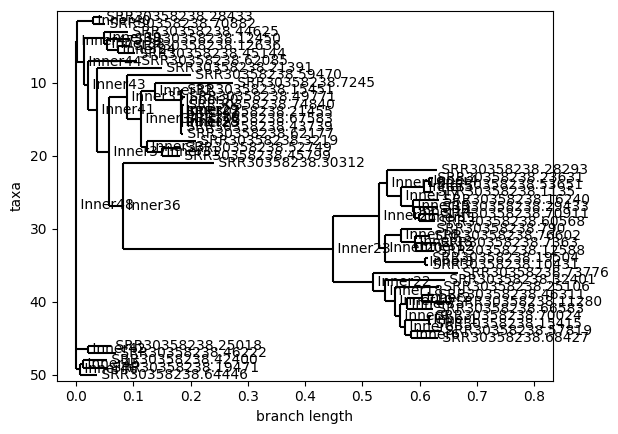

{e}


In [ ]:
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio import Phylo
import random

output_fasta = "/content/aligned_reads.fasta"
output_tree = "/content/phylogenetic_tree.xml"

# Calculate the distance matrix using the Jukes-Cantor model
calculator = DistanceCalculator('identity')
distance_matrix = calculator.get_distance(aligned_reads)

# Construct the phylogenetic tree using the Neighbor-Joining method
constructor = DistanceTreeConstructor(calculator, method='nj')
phylo_tree = constructor.build_tree(aligned_reads)

# Write the phylogenetic tree to a file
Phylo.write(phylo_tree, output_tree, "phyloxml")

# Visualize the phylogenetic tree
Phylo.draw(phylo_tree)

print("{e}")


## GC-content Analysis and Visualization

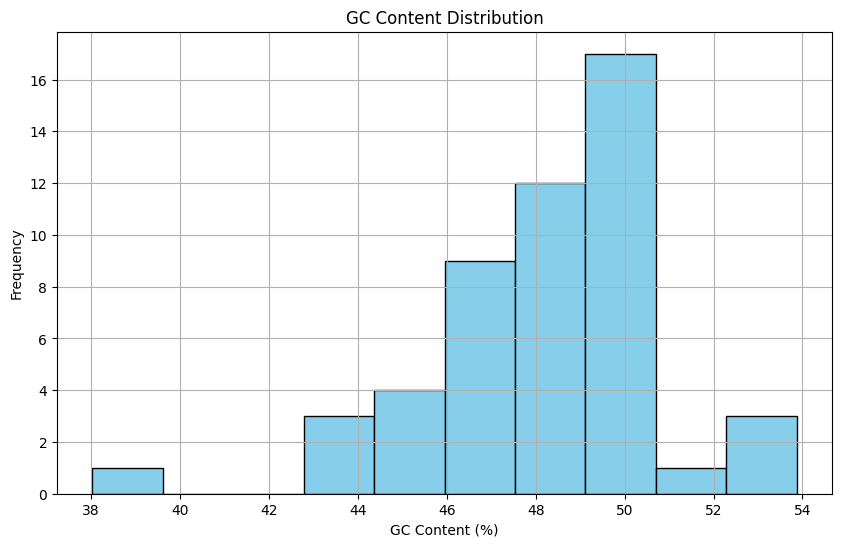

Sequence 1: GC Content: 47.54%
Sequence 2: GC Content: 47.54%
Sequence 3: GC Content: 48.59%
Sequence 4: GC Content: 44.72%
Sequence 5: GC Content: 46.48%
Sequence 6: GC Content: 48.24%
Sequence 7: GC Content: 48.94%
Sequence 8: GC Content: 47.18%
Sequence 9: GC Content: 47.18%
Sequence 10: GC Content: 38.03%
Sequence 11: GC Content: 45.42%
Sequence 12: GC Content: 46.13%
Sequence 13: GC Content: 46.13%
Sequence 14: GC Content: 50.00%
Sequence 15: GC Content: 52.46%
Sequence 16: GC Content: 44.72%
Sequence 17: GC Content: 50.70%
Sequence 18: GC Content: 47.18%
Sequence 19: GC Content: 49.65%
Sequence 20: GC Content: 44.01%
Sequence 21: GC Content: 48.24%
Sequence 22: GC Content: 53.17%
Sequence 23: GC Content: 49.30%
Sequence 24: GC Content: 47.89%
Sequence 25: GC Content: 50.35%
Sequence 26: GC Content: 50.00%
Sequence 27: GC Content: 50.00%
Sequence 28: GC Content: 48.24%
Sequence 29: GC Content: 48.24%
Sequence 30: GC Content: 49.65%
Sequence 31: GC Content: 43.66%
Sequence 32: GC C

In [ ]:
import matplotlib.pyplot as plt
from Bio import SeqIO

# Function to calculate GC content
def calculate_gc_content(sequence):
    gc_count = sum(1 for base in sequence if base in 'GC')
    return (gc_count / len(sequence)) * 100

# Function to analyze GC content in a FASTA file
def analyze_gc_content(fasta_file):
    gc_contents = []
    for record in SeqIO.parse(fasta_file, "fasta"):
        sequence = str(record.seq)
        gc_content = calculate_gc_content(sequence)
        gc_contents.append(gc_content)
    return gc_contents

# Function to plot histogram of GC contents
def plot_gc_content_histogram(gc_contents):
    plt.figure(figsize=(10, 6))
    plt.hist(gc_contents, bins=10, color='skyblue', edgecolor='black')
    plt.title("GC Content Distribution")
    plt.xlabel("GC Content (%)")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

# Example usage
fasta_file = "aligned_readsx.fasta"
gc_contents = analyze_gc_content(fasta_file)

# Plot histogram
plot_gc_content_histogram(gc_contents)

# Optional: Print GC content for each sequence
for i, gc_content in enumerate(gc_contents, 1):
    print(f"Sequence {i}: GC Content: {gc_content:.2f}%")